# Support Vector Machines: Face Identification

BUSMGT 7247

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set()

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

## Load Data

### Data Description

The dataset contains images of faces. The dataset includes a name label for each face.

Source: [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

In [2]:
# Load the Labeled Faces in the Wild dataset
lfw = fetch_lfw_people(min_faces_per_person=60)
print(lfw.images.shape)

(1348, 62, 47)


In [3]:
# List the unique names
np.unique(lfw.target_names)

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [4]:
# Get counts of each class
np.unique(lfw.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 77, 236, 121, 530, 109,  71,  60, 144]))

In [5]:
# Shape of each image is 62 x 47, yielding 2,914 pixels
lfw.images[0].shape

(62, 47)

In [6]:
# Print the first two rows of the first image
lfw.images[0][:2, :]

array([[138.      , 135.66667 , 127.666664, 120.666664, 117.      ,
        119.666664, 126.      , 133.33333 , 138.      , 143.66667 ,
        149.33333 , 152.      , 154.33333 , 157.33333 , 164.33333 ,
        166.66667 , 167.      , 166.      , 159.      , 157.66667 ,
        160.33333 , 162.66667 , 169.      , 166.33333 , 160.      ,
        156.66667 , 153.66667 , 154.66667 , 152.33333 , 147.33333 ,
        142.33333 , 136.      , 133.      , 130.      , 126.666664,
        123.666664, 113.666664, 101.666664,  88.333336,  83.666664,
         78.      ,  72.666664,  70.666664,  70.      ,  69.      ,
         68.333336,  67.333336],
       [146.      , 139.33333 , 125.      , 116.333336, 113.666664,
        117.333336, 128.      , 138.33333 , 141.33333 , 142.      ,
        145.33333 , 149.      , 153.66667 , 157.33333 , 162.66667 ,
        167.      , 168.33333 , 169.66667 , 165.      , 160.33333 ,
        161.66667 , 164.33333 , 168.66667 , 165.      , 161.      ,
        158.666

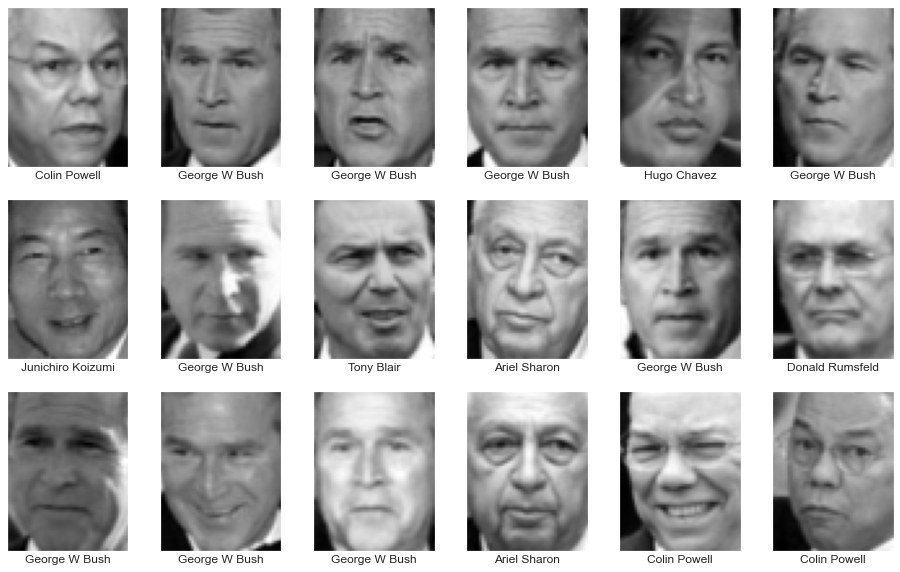

In [7]:
# Display images of first 18 faces
fig, axs = plt.subplots(3, 6, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(lfw.images[i], cmap='gray')
    ax.set(xticks=[], yticks=[],
            xlabel=lfw.target_names[lfw.target[i]])

In [8]:
# Fit a Gaussian SVM
y = lfw.target_names[lfw.target]
X = lfw.data

svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

svc_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [9]:
# Evaluate the performance of the SVM
y_pred = svc_pipe.predict(X)
print(classification_report(y, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.94      0.97        77
     Colin Powell       0.97      0.98      0.98       236
  Donald Rumsfeld       1.00      0.93      0.97       121
    George W Bush       0.95      1.00      0.98       530
Gerhard Schroeder       0.99      0.98      0.99       109
      Hugo Chavez       1.00      0.99      0.99        71
Junichiro Koizumi       1.00      0.97      0.98        60
       Tony Blair       1.00      0.94      0.97       144

         accuracy                           0.98      1348
        macro avg       0.99      0.97      0.98      1348
     weighted avg       0.98      0.98      0.98      1348



In [14]:
# Get locations of the model's misses
miss_idx = np.flatnonzero(y != y_pred)
miss_idx.shape

(32,)

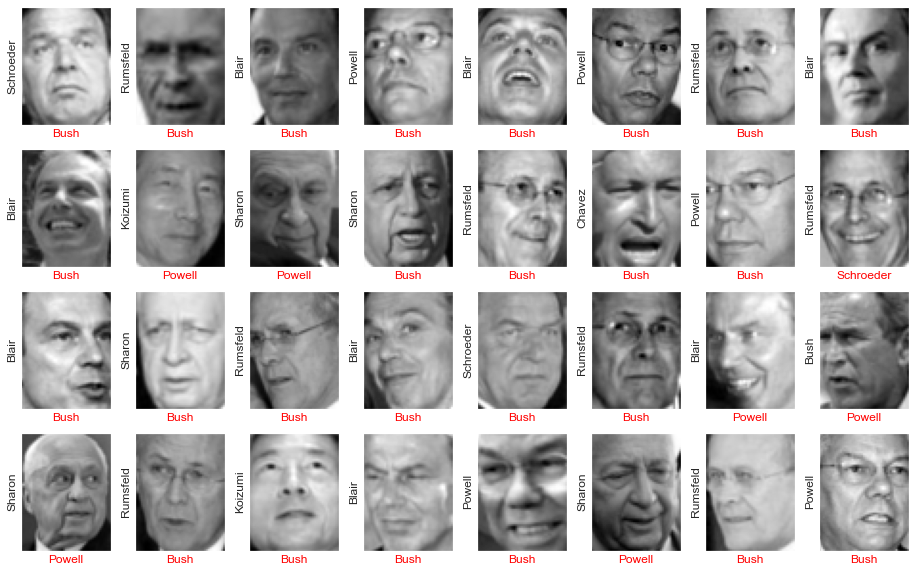

In [15]:
# Visualize the model's misses
miss_image = lfw.images[miss_idx]
miss_pred = y_pred[miss_idx]
miss_actual = y[miss_idx]

fig, axs = plt.subplots(4, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(miss_image[i], cmap='gray')
    ax.set(xticks=[], yticks=[],
           ylabel=miss_actual[i].split()[-1])
    ax.set_xlabel(miss_pred[i].split()[-1], color='red')

### Exercise

Use a train-test split and cross-validation to evaluate different parameters and kernels to see whether you can improve accuracy. Do you expect the model to generalize well?